# Cost Complexity Pruning - Post Pruning Techniques

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


# Import packages

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

# Load Data

In [8]:
X, y = load_breast_cancer(return_X_y = True)
X.shape, y.shape, type(X), type(y)

((569, 30), (569,), numpy.ndarray, numpy.ndarray)

In [14]:
np.unique(y, return_counts=True)

<IPython.core.display.Javascript object>

(array([0, 1]), array([212, 357], dtype=int64))

In [11]:
np.count_nonzero(y)

<IPython.core.display.Javascript object>

357

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
len(y_train), len(y_test)

(455, 114)

In [16]:
np.unique(y_test, return_counts=True)

<IPython.core.display.Javascript object>

(array([0, 1]), array([42, 72], dtype=int64))

<IPython.core.display.Javascript object>

(array([42.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 72.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

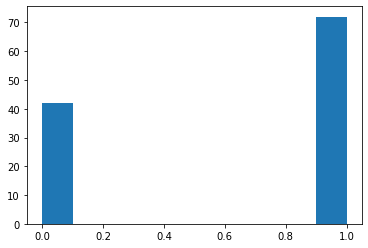

In [17]:
plt.hist(y_test)

# Create Model

In [18]:
clf = DecisionTreeClassifier(random_state=42)

### See the default values for the model

In [25]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [23]:
print(clf.__doc__)

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_spli

### Model train / predict

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = clf.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.9122807017543859

In [30]:
print(confusion_matrix(y_test, y_pred))

[[39  3]
 [ 7 65]]


## Plot 

<IPython.core.display.Javascript object>

[Text(564.9749999999999, 764.4375, 'X[20] <= 16.795\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(393.39, 662.5125, 'X[27] <= 0.136\ngini = 0.162\nsamples = 304\nvalue = [27, 277]'),
 Text(251.09999999999997, 560.5875, 'X[13] <= 91.555\ngini = 0.036\nsamples = 271\nvalue = [5, 266]'),
 Text(217.61999999999998, 458.66249999999997, 'X[13] <= 38.605\ngini = 0.029\nsamples = 270\nvalue = [4, 266]'),
 Text(133.92, 356.7375, 'X[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(66.96, 254.8125, 'X[21] <= 26.635\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(33.48, 152.88750000000005, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(100.44, 152.88750000000005, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(200.88, 254.8125, 'X[21] <= 33.27\ngini = 0.008\nsamples = 254\nvalue = [1, 253]'),
 Text(167.39999999999998, 152.88750000000005, 'gini = 0.0\nsamples = 236\nvalue = [0, 236]'),
 Text(234.35999999999999, 152.88750000000005, 'X[21] <= 33.8\ngini = 0.105\

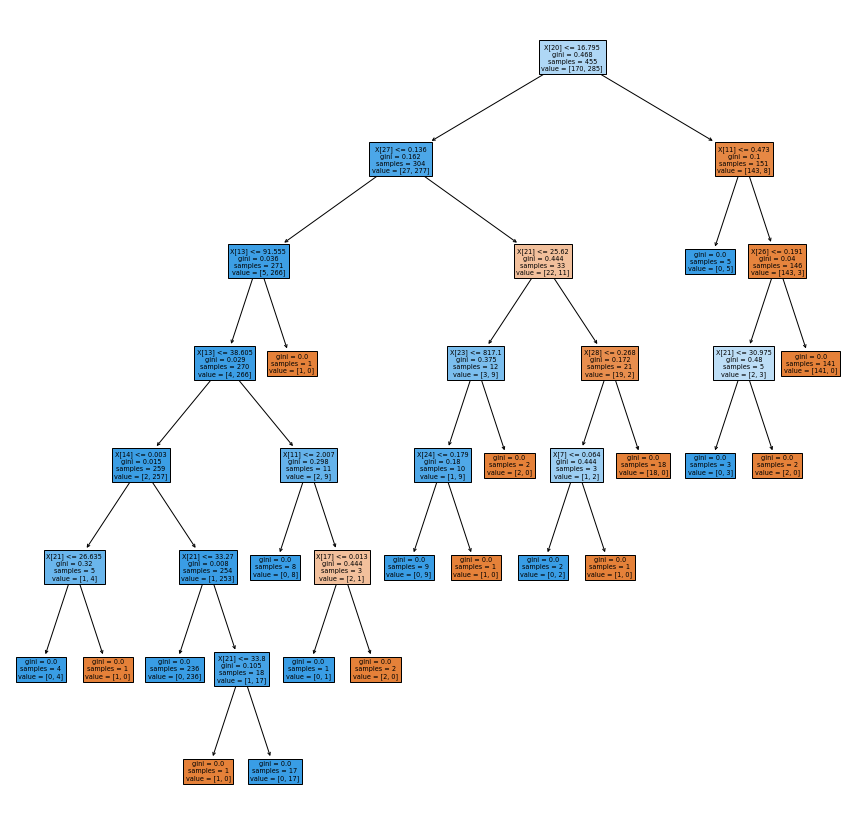

In [34]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf, filled=True)

# Model Pruning

In [36]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [37]:
len(ccp_alphas)

14

In [38]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [39]:
clfs = []

for alpha in ccp_alphas:
    clf_tmp = DecisionTreeClassifier(ccp_alpha=alpha)
    clf_tmp.fit(X_train, y_train)
    clfs.append(clf_tmp)

# We remove the last entry, since it is a trivial tree with 1 node.
print(f"No. of nodes in the last tree is {clfs[-1].tree_.node_count} with CCP_Alpha {ccp_alphas[-1]}")
    

No. of nodes in the last tree is 1 with CCP_Alpha 0.3266170719072906


## After Pruning do the score validation on Train and Test Datasets

In [40]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

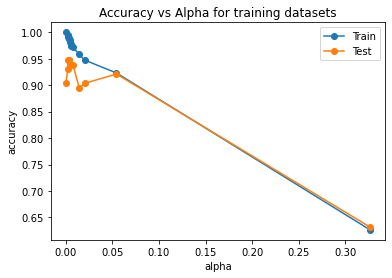

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training datasets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label='Train')
ax.plot(ccp_alphas, test_scores, marker='o', label='Test')
ax.legend()
plt.show()

## Train the Model with Best alpha value

In [46]:
model_with_best_param = DecisionTreeClassifier(random_state=0, ccp_alpha=0.06)

In [47]:
model_with_best_param.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.06, random_state=0)

In [48]:
y_pred_best_params= model_with_best_param.predict(X_test)


In [50]:
accuracy_score(y_test, y_pred_best_params)

0.9210526315789473

<IPython.core.display.Javascript object>

[Text(418.5, 407.70000000000005, 'X[20] <= 16.795\ngini = 0.468\nsamples = 455\nvalue = [170, 285]'),
 Text(209.25, 135.89999999999998, 'gini = 0.162\nsamples = 304\nvalue = [27, 277]'),
 Text(627.75, 135.89999999999998, 'gini = 0.1\nsamples = 151\nvalue = [143, 8]')]

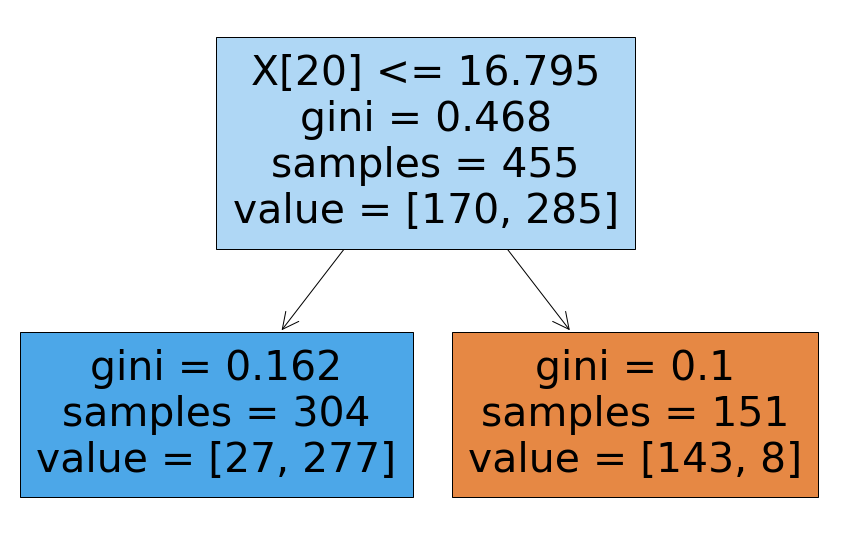

In [52]:
plt.figure(figsize=(15,10))
tree.plot_tree(model_with_best_param, filled=True)
